In [ ]:
# importing libraries
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/final/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/final/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
# displaying shape of the data
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

In [ ]:
# plitting data
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# applying augmentation techniques
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Data augmentation and normalization parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255.0  # Normalize pixel values to the range [0, 1]
)

# Split the data and labels into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Extract the shape of the input images
num_samples, height, width, channels = x_train.shape


augmented_data_train = []
for x, y in zip(x_train, y_train):
    x_augmented = datagen.random_transform(x)  
    augmented_data_train.append((x_augmented, y))

# Convert augmented training data back to numpy arrays
x_train = np.array([sample[0] for sample in augmented_data_train])
y_train = np.array([sample[1] for sample in augmented_data_train])

In [ ]:
# defining model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(128, 128, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 128)      

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=40, verbose=1)




Epoch 1/10
3/3 [==============================] - 34s 10s/step - loss: 0.0344 - accuracy: 0.9910
Epoch 2/10
3/3 [==============================] - 32s 10s/step - loss: 0.1647 - accuracy: 0.9910
Epoch 3/10
3/3 [==============================] - 32s 10s/step - loss: 0.0108 - accuracy: 0.9910
Epoch 4/10
3/3 [==============================] - 37s 13s/step - loss: 0.1889 - accuracy: 0.9730
Epoch 5/10
3/3 [==============================] - 32s 11s/step - loss: 0.0172 - accuracy: 0.9910
Epoch 6/10
3/3 [==============================] - 33s 11s/step - loss: 0.0365 - accuracy: 0.9910
Epoch 7/10
3/3 [==============================] - 33s 10s/step - loss: 0.0064 - accuracy: 0.9910
Epoch 8/10
3/3 [==============================] - 33s 10s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 32s 10s/step - loss: 0.0039 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 33s 11s/step - loss: 0.0156 - accuracy: 0.9910


In [ ]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Printting the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 3s 3s/step - loss: 17.4282 - accuracy: 0.6429
Test Loss: 17.428239822387695
Test Accuracy: 0.6428571343421936


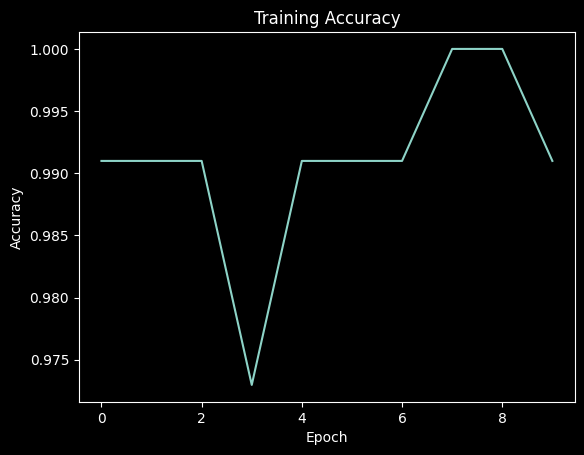

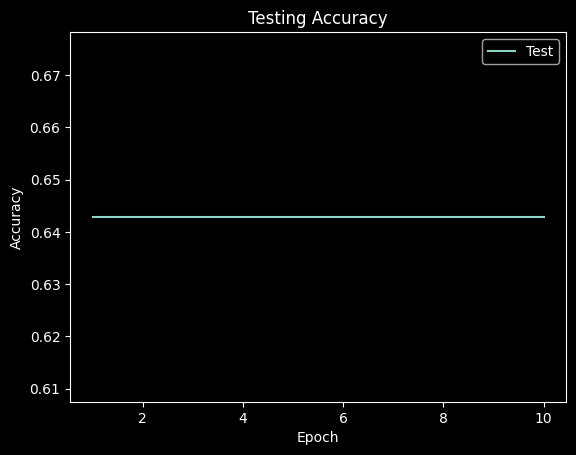

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot testing accuracy
plt.plot(range(1, 11), [test_accuracy] * 10, label='Test')
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()




In [ ]:
def names(number):
    if number==0:
        return 'a Tumor'
    else:
        return 'No, not a tumor'

99.93059635162354% Confidence This Is No, not a tumor


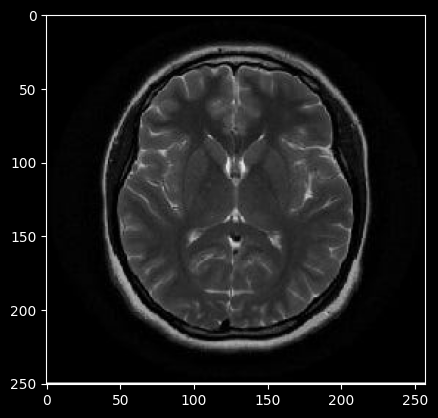

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/final/1_BGxLxoHd8MG9m8gesYIprw.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.98918771743774% Confidence This Is A a Tumor


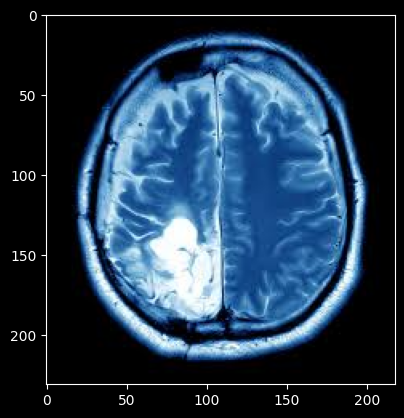

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/final/images.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


check


In [ ]:
train_df

,filepaths,labels


In [ ]:
ts_df

,filepaths,labels


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
